# 28 Parsing QGIS Style Files to GemGIS

The following will present how to load QGIS style files (QML files) into `GemGIS`, how to set the colors for [GeoPandas](https://geopandas.org/) plots and how to automatically set the surface colors for a [GemPy](https://github.com/cgre-aachen/gempy) model. 

QML is an XML format for storing layer styling. A QML file contains all the information QGIS can handle for the rendering of feature geometries including symbol definitions, sizes and rotations, labelling, opacity and blend mode and more.

<img src="../images/tutorial28_cover.png">

Sources: https://docs.qgis.org/3.4/en/docs/user_manual/appendices/qgis_file_formats.html#qml-the-qgis-style-file-format

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/28_parsing_QGIS_style_files/'

# Load Files

In [2]:
import gemgis as gg
import geopandas as gpd

polygons = gpd.read_file(file_path + 'interfaces_polygons.shp')
polygons

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,id,formation,geometry
0,None,Sand1,"POLYGON ((0.256 264.862, 10.593 276.734, 17.13..."
1,None,Ton,"POLYGON ((0.256 264.862, 0.188 495.787, 8.841 ..."
2,None,Sand2,"POLYGON ((0.188 495.787, 0.249 1068.760, 278.5..."
3,None,Sand2,"POLYGON ((511.675 1068.852, 971.698 1068.800, ..."


## Plotting the data with default colors

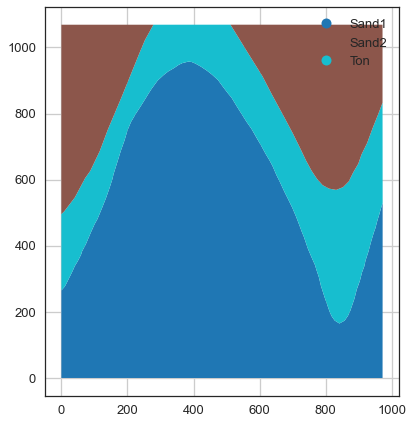

In [9]:
import matplotlib.pyplot as plt

polygons.plot(column='formation', aspect='equal', legend=True)
plt.grid()

Loading a QML style file. The GeoDataFrame of the plotted polygons have to be provided to create a list of colors. These colors are equal to `unique()` formations the geological map contains. The surface colors can be loaded with ``load_surface_colors(..)`` by providing the path to the style file and the corresponding GeoDataFrame.

In [4]:
cols = gg.utils.load_surface_colors(path=file_path + 'style.qml', 
                                    gdf=polygons)
cols

['#b35a2a', '#b35a2a', '#525252']

In [5]:
polygons['formation'].unique()

array(['Sand1', 'Ton', 'Sand2'], dtype=object)

## Plotting the data with loaded colors

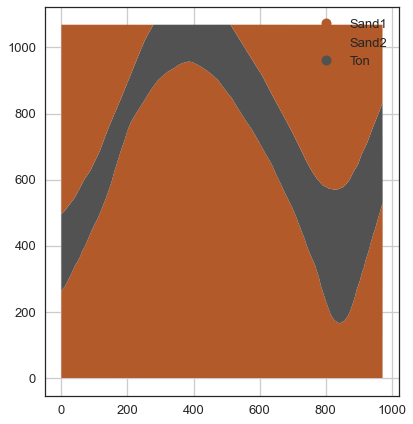

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

polygons.plot(column='formation', aspect='equal', legend=True, cmap=ListedColormap(cols))
plt.grid()

## Creating surface color dictionary from Style File

A surface color dict can be created to change the colors of a GemPy Model by using ``create_surface_color_dict(..)``.

In [11]:
surface_color_dict = gg.utils.create_surface_color_dict(path=file_path + 'style.qml')
surface_color_dict

{'Sand1': '#b35a2a', 'Sand2': '#b35a2a', 'Ton': '#525252'}